# Confidence Interval Simulation
lets imagine we have a population of data and want to estimate the population mean using samples. We arrive at the following result: A mean of 5 with a confidence interval of +- 1 at a 95% confidence level.<br><br>
Wrong interpretation:<br> Many believe this means the true population mean must necessarily fall between 4 and 6, but this interpretation is incorrect.<br><br>
Correct interpretation:<br>
If we were to take 100 samples from this population, about 95 of those intervals, calculated as the sample mean +- 1, would contain the true population mean.

## Simulation

In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

In [78]:
mu = 1
pop_size = 10000
pop_exponential = np.random.exponential(mu,pop_size).tolist()

In [79]:
low = 0  # Limite inferior
high = 10  # Limite superior
pop_size = 10000
uniform_dist = np.random.uniform(low, high, pop_size).tolist()

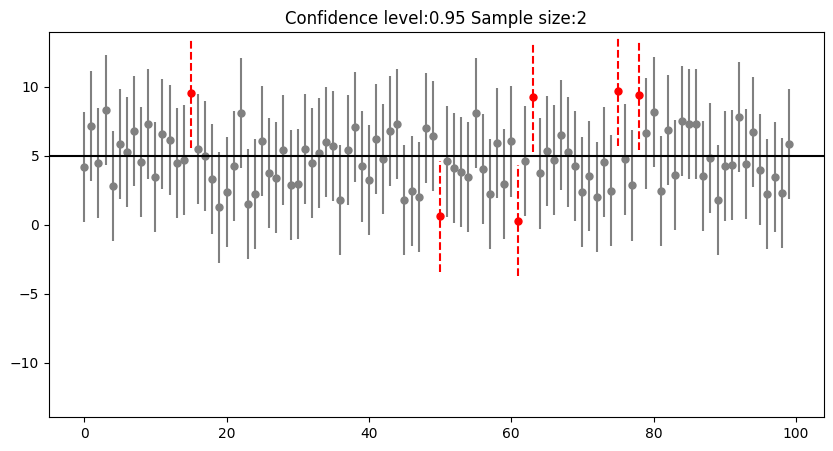

proportion of wrong: 0.06
proportion of right: 0.94


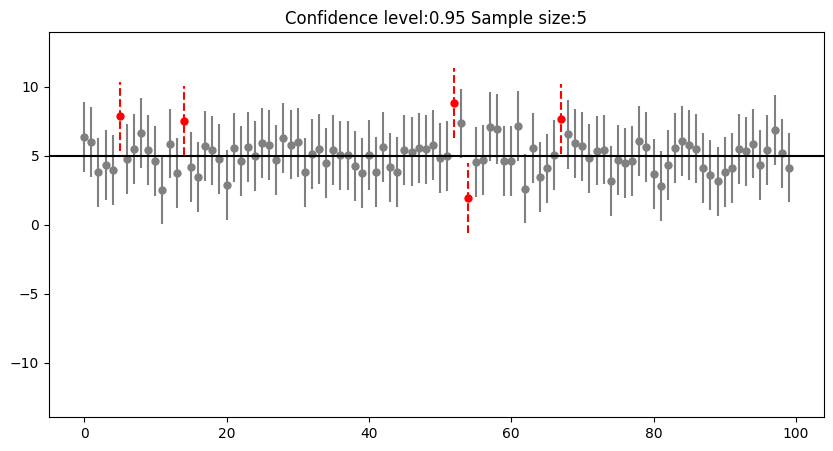

proportion of wrong: 0.05
proportion of right: 0.95


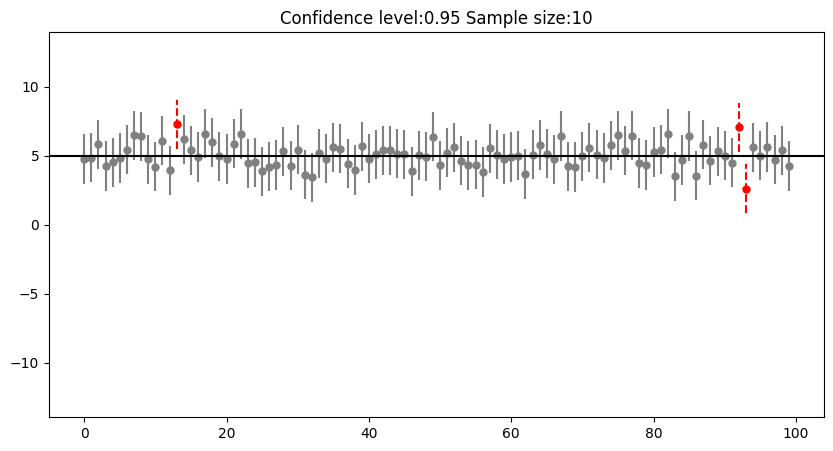

proportion of wrong: 0.03
proportion of right: 0.97


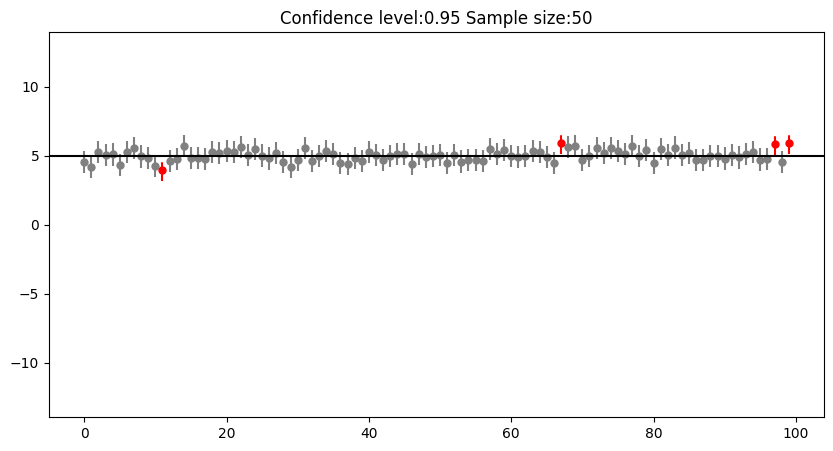

proportion of wrong: 0.04
proportion of right: 0.96


In [80]:
population = uniform_dist
# population = pop_exponential # plyg it for exponential distribution
sample_size_list =[2,5,10,50]
n_samples = 100
confidence_level = 0.95

population_mean = np.mean(population)
population_std = np.std(population)
z = abs(norm.ppf((1-confidence_level)/2))



# simulation
for a in sample_size_list:
    count_wrong = 0
    sample_size = a
    interval = z*population_std/np.sqrt(sample_size)
    plt.figure(figsize=(10,5))
    for n in range(0,n_samples):
        X = np.random.choice(population, sample_size, replace = True)
        mean = np.mean(X)
        li = mean - interval
        ls = mean + interval
    
        if (population_mean> li and population_mean <ls):
            plt.vlines(n, ymin=li, ymax=ls, color = 'gray')
            plt.plot(n,mean, 'o', color = 'gray', 
                     markersize=5)
    
        else:
            count_wrong = count_wrong + 1
            plt.vlines(n, ymin=li, ymax=ls, color = 'red', linestyles = 'dashed')
            plt.plot(n,mean, 'o', color = 'red',
                     markersize=5)
    
            
    plt.axhline(y = population_mean, color = 'black')  
    plt.ylim(-population_mean-population_mean*1.8, population_mean+population_mean*1.8)
    plt.title(f'Confidence level:{confidence_level} Sample size:{sample_size}')
    plt.show()
    print(f'proportion of wrong: {count_wrong/n_samples}')
    print(f'proportion of right: {1 - count_wrong/n_samples}')



## conclusion
As we increase the size of each sample, the smaller the confidence interval becomes while maintaining the same confidence level. Also, we simulated with only 100 samples. If you try the simulation with more samples, the values for the proportion will get closer to the confidence level. For instance, try using 1,000 samples.